In [19]:
import numpy as np
import healpy as hp
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
print 'Reading files'
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
r = r[1].data
print len(w)
print len(r)

Reading files
132684
26111


In [21]:
# RA e DEC - catalogo Wen
w['RAJ2000'], w['DEJ2000']

(<MaskedColumn name='RAJ2000' dtype='float64' length=132684>
   0.00236
   0.00957
   0.01377
   0.01475
   0.01945
   0.02024
   0.02303
   0.02482
   0.02643
   0.02755
   0.02762
   0.02765
       ...
 359.96988
 359.97192
 359.97241
  359.9729
 359.97311
 359.97504
 359.97543
 359.98712
 359.99329
   359.995
 359.99677
  359.9986, <MaskedColumn name='DEJ2000' dtype='float64' length=132684>
  32.20925
   5.28827
  31.23175
  31.78564
   2.47386
  -3.54679
  35.76957
   15.4299
  22.20558
  10.11333
  31.87626
  29.35813
       ...
   0.69856
  -9.76429
  13.70903
   -7.9587
   3.45559
  30.13158
 -11.13708
  22.67506
  13.29671
   0.70175
  21.78513
  -3.43781)

In [22]:
# RA e DEC catalogo Redmapper
r['RA'], r['DEC']

(array([ 239.58332907,  250.08254839,  197.87295717, ...,  180.83079888,
         153.82422578,  135.96337099]),
 array([ 27.23341292,  46.71153135,  -1.34111628, ...,  52.37043161,
         43.63535754,  15.20173173]))

In [23]:
NSIDE = 128

In [24]:
# Area de cada pixel
hp.nside2pixarea(NSIDE, degrees = True)

0.2098234113027917

In [25]:
phi_w = np.deg2rad(w['RAJ2000'])
theta_w = np.deg2rad(90.-w['DEJ2000'])

In [26]:
phi_r = np.deg2rad(r['RA'])
theta_r = np.deg2rad(90.-r['DEC'])

In [27]:
wpix = hp.ang2pix(NSIDE, theta_w, phi_w)

In [28]:
n = np.arange(hp.nside2npix(NSIDE))

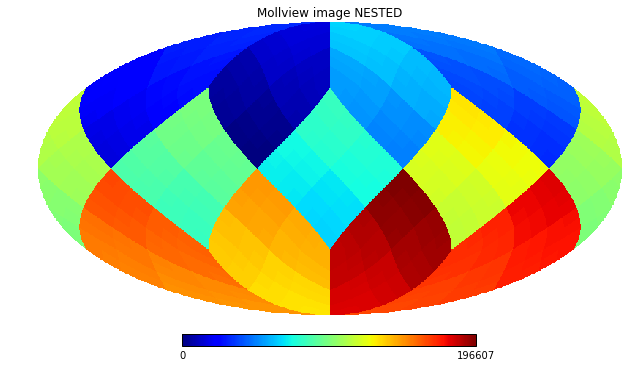

In [29]:
hp.mollview(n, nest=True, title="Mollview image NESTED")

In [30]:
rpix = hp.ang2pix(NSIDE, theta_r, phi_r)

In [31]:
m = np.arange(hp.nside2npix(NSIDE))

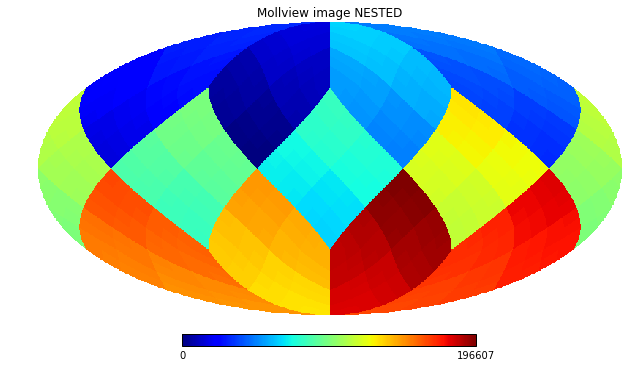

In [32]:
hp.mollview(m, nest=True, title="Mollview image NESTED")

In [33]:
print(hp.get_map_size(m))
print(hp.get_map_size(n))

196608
196608


In [34]:
print rpix, wpix

[ 53332  27002 100377 ...,  20402  30222  72641] DEJ2000
-------
  45312
  89344
  47360
  46336
  93440
 103680
  40192
  71936
  60672
  81152
    ...
 114944
  75008
 111872
  92416
  48384
 116992
  60671
  75008
  96512
  61696
 103680
Length = 132684 rows


In [35]:
print len(wpix)
print len(rpix)

132684
26111


Codigo do Match:
Primeira parte designa-se a letra i e j a uma dada lista de valores, onde foi utlizado o for para roda-los. A variavel c serve como contador, e as listas serao feitas, a medida, que o codio vai rodando, uma com os pixels do wen e outra do rykoff.
Usa-se o len, para sabermos qual catalogo eh maior. Depois com uso do if, se compara o numero do pixel de um catalogo com o de outro, para assim obtermos o match.

In [36]:
i = 0
j = 0
c = 0
lista_w = []
lista_r = []
if len(rpix) > len(wpix):
    a = len(rpix)
    print a
else:
    a = len(wpix)
    print a
if len(rpix) < len(wpix):
    b = len(rpix)
    print b
else:
    b = len(wpix)
    print b
for i in range(a): 
    for j in range(b):
        if wpix[i]==rpix[j]:
            i = i + 1
            j = j + 1
            c = c + 1
            lista_w.append(wpix[i])
            lista_r.append(rpix[i])
            print 'Lista de pixels do Wen: ', lista_w
            print 'Lista de pixels do Rykoff: ', lista_r
            print 'Contador: ', c

132684
26111
Lista de pixels do Wen:  [89344]
Lista de pixels do Rykoff:  [27002]
Contador:  1
Lista de pixels do Wen:  [89344, 47360]
Lista de pixels do Rykoff:  [27002, 100377]
Contador:  2
Lista de pixels do Wen:  [89344, 47360, 47360]
Lista de pixels do Rykoff:  [27002, 100377, 100377]
Contador:  3
Lista de pixels do Wen:  [89344, 47360, 47360, 40192]
Lista de pixels do Rykoff:  [27002, 100377, 100377, 114916]
Contador:  4
Lista de pixels do Wen:  [89344, 47360, 47360, 40192, 71936]
Lista de pixels do Rykoff:  [27002, 100377, 100377, 114916, 63958]
Contador:  5
Lista de pixels do Wen:  [89344, 47360, 47360, 40192, 71936, 60672]
Lista de pixels do Rykoff:  [27002, 100377, 100377, 114916, 63958, 26381]
Contador:  6
Lista de pixels do Wen:  [89344, 47360, 47360, 40192, 71936, 60672, 81152]
Lista de pixels do Rykoff:  [27002, 100377, 100377, 114916, 63958, 26381, 21171]
Contador:  7
Lista de pixels do Wen:  [89344, 47360, 47360, 40192, 71936, 60672, 81152, 71936]
Lista de pixels do Ryk

KeyboardInterrupt: 